

* The Python package rpy2 has an [RMagic](https://rpy2.github.io/doc/v3.0.x/html/interactive.html?highlight=rmagic) module that facilitates using R inside a Jupyter notebook running Python

In [7]:
# Load the RMagic extension into Jupyter Notebook
%load_ext rpy2.ipython

Any Jupyter notebook cell that contains R code must be prefaced by the %%R "magic" statement.

In [8]:
%%R
library(tidyverse)
library(GGally)

R[write to console]: Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

R[write to console]: Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

R[write to console]: ✔ ggplot2 3.1.1     ✔ purrr   0.3.2
✔ tibble  2.1.1     ✔ dplyr   0.8.1
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R[write to console]: Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

R[write to console]: 
Attaching package: ‘GGally’


R[write to console]: The following object is masked from ‘package:dplyr’:

    nasa




# Make funky data

* We'll use the Python package Scikit-learn
* The module <code>sklearn.datasets</code> has a function called <code>make_classification()</code>
* Creates clusters of points
* Points are normally distributed about vertices in N-dimensional hypercube
    * N is the number of informative dimensions
    * Cube side length = 2 * class_sep

In [4]:
from sklearn.datasets import make_classification, make_moons, make_circles
import pandas as pd

In [5]:
n_samples = 200

In [20]:
Xgauss, Y = make_classification( 
    n_samples=n_samples,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    weights=None,
    flip_y=0.00,
    class_sep=0.6,
    hypercube=True,
    shift=0.0,
    scale=1.0,
    shuffle=False,
    random_state=None,)

## Create a Python DataFrame

In [21]:
data1 = pd.DataFrame( Xgauss )
data1.columns = ['Gaussian1', 'Gaussian2']
# add intercepts
#data1['Gaussian1'] += 10
#data1['Gaussian2'] -= 10
data1[ 'Y' ] = Y

## Pass the data to R and make a scatterplot matrix

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



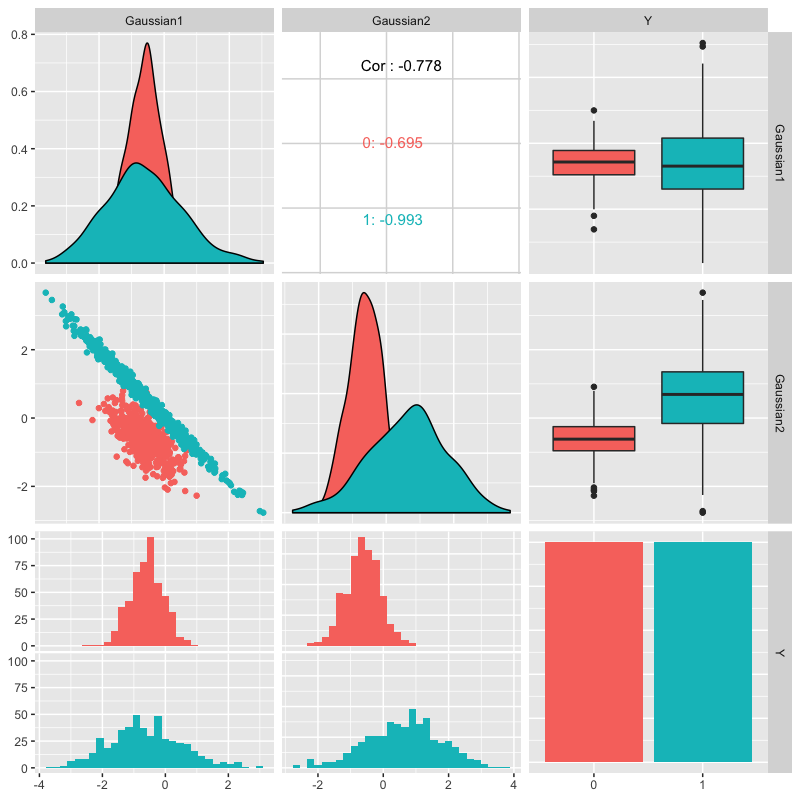

In [22]:
%%R -i data1 -w 8 -h 8 -u in -r 100
data1$Y <- factor( data1$Y )
data1 %>% ggpairs( aes( color=Y ) )

In [23]:
data1.drop( columns='Y', inplace=True )

In [26]:
Xmoon, Y = make_moons( n_samples=n_samples, shuffle=False, noise=0.15, random_state=None)

In [27]:
data2 = pd.DataFrame( Xmoon )
data2.columns = ['Moon1', 'Moon2']
data2[ 'Y' ] = Y

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



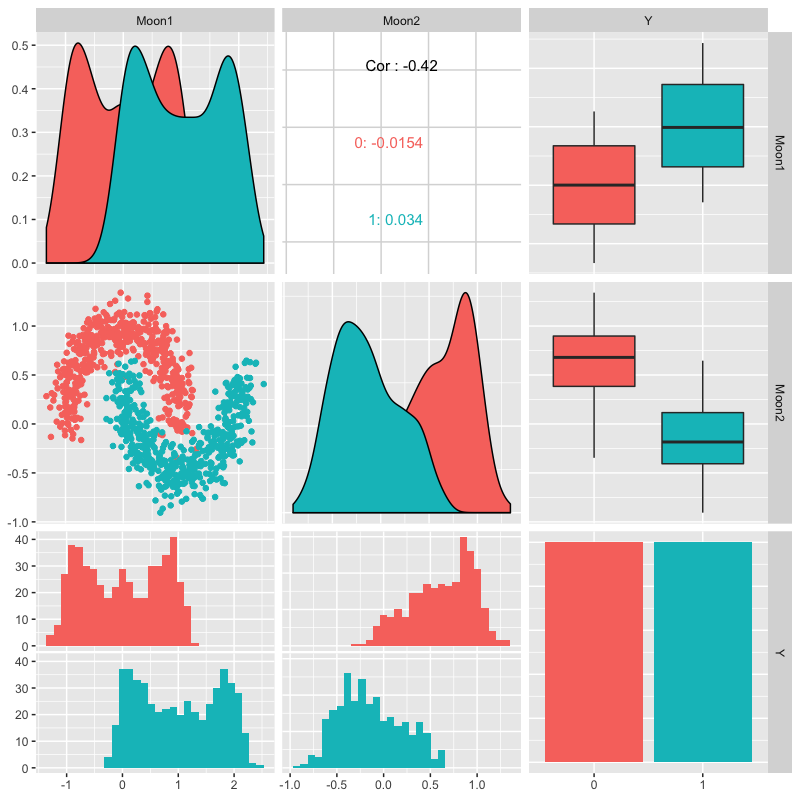

In [28]:
%%R -i data2 -w 8 -h 8 -u in -r 100
data2$Y <- factor( data2$Y )
data2 %>% ggpairs( aes( color=Y ) )

In [29]:
data2.drop( columns='Y', inplace=True )

In [30]:
Xcircle, Y = make_circles( n_samples=n_samples, shuffle=False, noise=0.15, random_state=None, factor=0.5 )

In [31]:
data3 = pd.DataFrame( Xcircle )
data3.columns = ['Circle1', 'Circle2']
data3[ 'Y' ] = Y

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



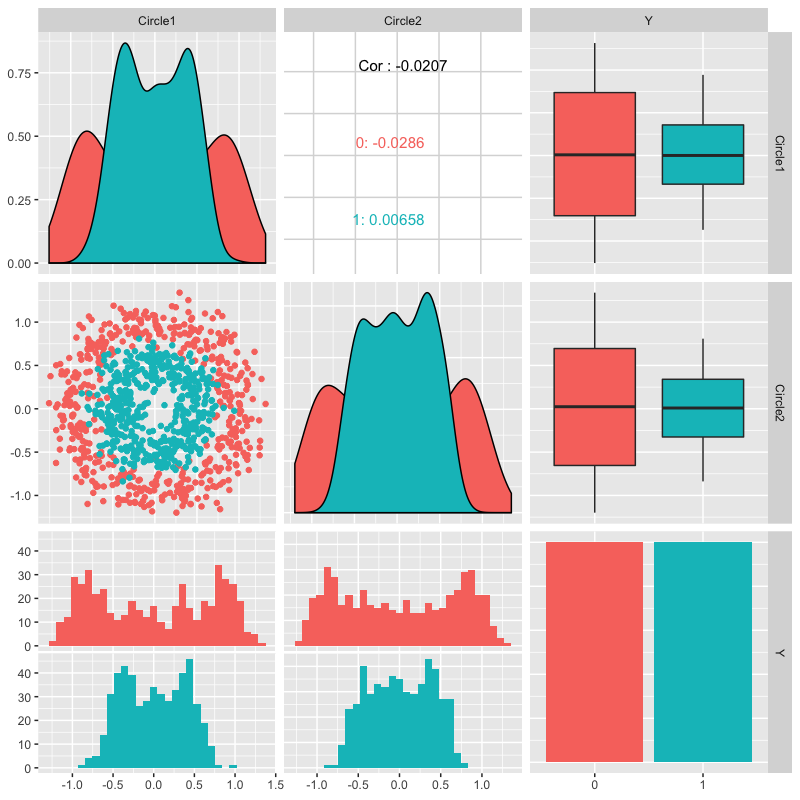

In [32]:
%%R -i data3 -w 8 -h 8 -u in -r 100
data3$Y <- factor( data3$Y )
data3 %>% ggpairs( aes( color=Y ) )

In [33]:
data = pd.concat( (data1, data2, data3), axis=1)

In [34]:
data.shape

(1000, 7)

In [35]:
data.columns

Index(['Gaussian1', 'Gaussian2', 'Moon1', 'Moon2', 'Circle1', 'Circle2', 'Y'], dtype='object')

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



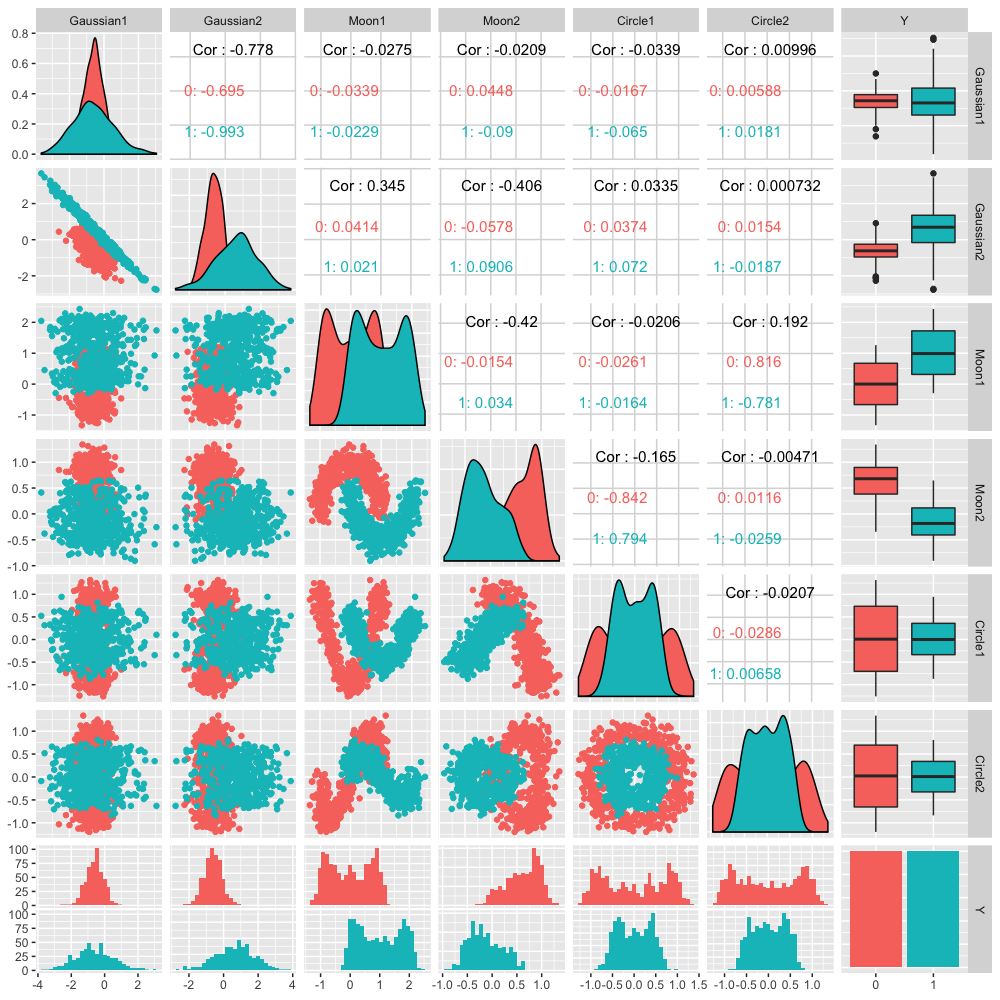

In [36]:
%%R -i data -w 10 -h 10 -u in -r 100
data$Y <- factor( data$Y )
data %>% ggpairs( aes( color=Y ) )

In [37]:
data.sample(frac=1).to_csv( 'funkydata.csv', index=False )

# Make Unequal variance data

In [38]:
from sklearn.datasets import make_hastie_10_2

In [39]:
Xhastie, y = make_hastie_10_2( n_samples )

In [40]:
Xhastie.shape

(1000, 10)

In [41]:
data4 = pd.DataFrame( Xhastie )

In [42]:
data4['Y'] = y

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



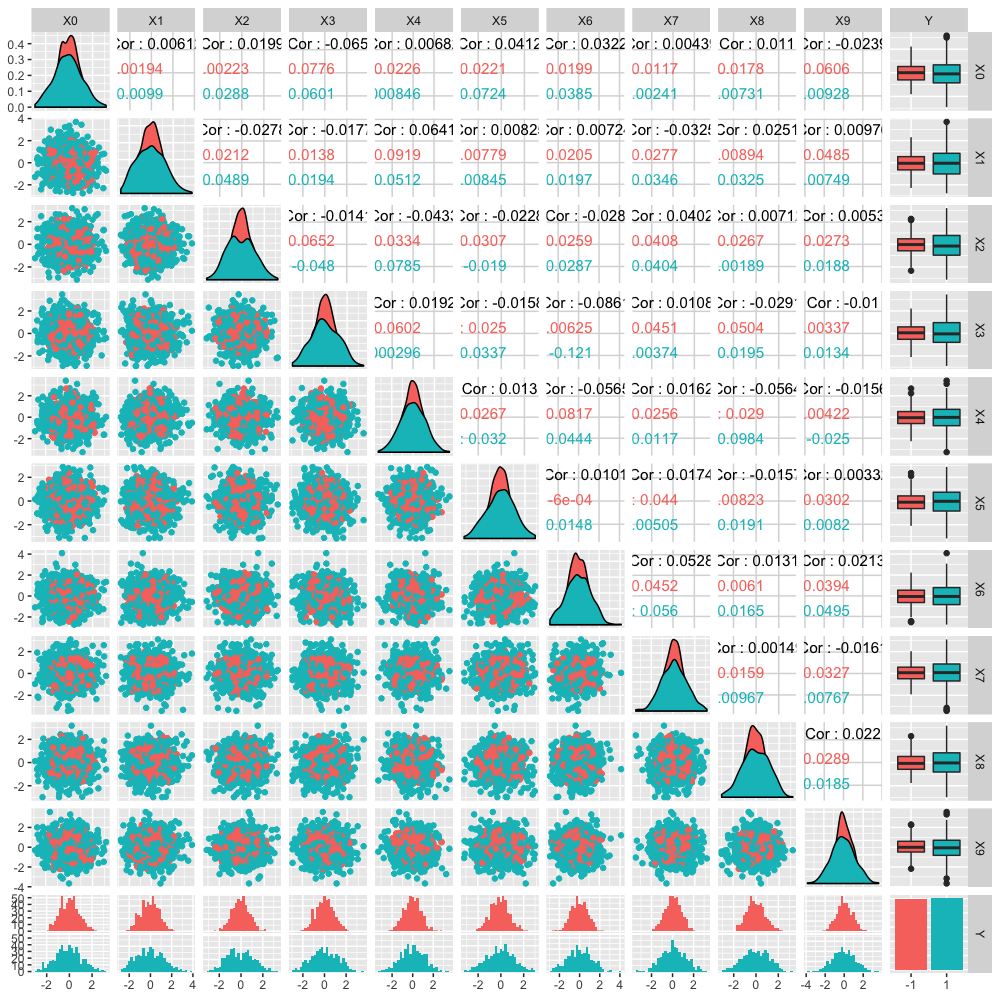

In [43]:
%%R -i data4 -w 10 -h 10 -u in -r 100
data4$Y <- factor( data4$Y )
data4 %>% ggpairs( aes( color=Y ) )

In [44]:
data4.sample(frac=1).to_csv( 'unequal_variance_data.csv', index=False )